# Background 

Now take your Keras skills and go build another neural network. Pick your data set, but it should be one of abstract types, possibly even nonnumeric, and use Keras to make five implementations of your network. Compare them both in computational complexity as well as in accuracy and given that tradeoff decide which one you like best.

Your dataset should be sufficiently large for a neural network to perform well (samples should really be in the thousands here) and try to pick something that takes advantage of neural networks’ ability to have both feature extraction and supervised capabilities, so don’t pick something with an easy to consume list of features already generated for you (though neural networks can still be useful in those contexts)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os

In [13]:
#Listing the training set
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("./fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

In [14]:
# Create unique numbers so that I have a proper list of the folders.
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [15]:
# Look to see if I have the folders imported 
id_to_label_dict

{0: 'Apple Braeburn',
 1: 'Apple Golden 1',
 2: 'Apple Golden 2',
 3: 'Apple Golden 3',
 4: 'Apple Granny Smith',
 5: 'Apple Red 1',
 6: 'Apple Red 2',
 7: 'Apple Red 3',
 8: 'Apple Red Delicious',
 9: 'Apple Red Yellow',
 10: 'Apricot',
 11: 'Avocado',
 12: 'Avocado ripe',
 13: 'Banana',
 14: 'Banana Red',
 15: 'Cactus fruit',
 16: 'Cantaloupe 1',
 17: 'Cantaloupe 2',
 18: 'Carambula',
 19: 'Cherry 1',
 20: 'Cherry 2',
 21: 'Cherry Rainier',
 22: 'Cherry Wax Black',
 23: 'Cherry Wax Red',
 24: 'Cherry Wax Yellow',
 25: 'Clementine',
 26: 'Cocos',
 27: 'Dates',
 28: 'Granadilla',
 29: 'Grape Pink',
 30: 'Grape White',
 31: 'Grape White 2',
 32: 'Grapefruit Pink',
 33: 'Grapefruit White',
 34: 'Guava',
 35: 'Huckleberry',
 36: 'Kaki',
 37: 'Kiwi',
 38: 'Kumquats',
 39: 'Lemon',
 40: 'Lemon Meyer',
 41: 'Limes',
 42: 'Lychee',
 43: 'Mandarine',
 44: 'Mango',
 45: 'Maracuja',
 46: 'Melon Piel de Sapo',
 47: 'Mulberry',
 48: 'Nectarine',
 49: 'Orange',
 50: 'Papaya',
 51: 'Passion Fruit',


In [16]:
# Turn labels into numerical arrays.
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [17]:
# Look at data shape
fruit_images.shape, label_ids.shape, labels.shape

((37836, 45, 45, 3), (37836,), (37836,))

In [18]:
# Creating the testing set.
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("./fruits-360/Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [19]:
validation_label_ids = np.array([label_to_id_dict[x] for x in validation_labels])

In [20]:
validation_fruit_images.shape, validation_label_ids.shape

((12709, 45, 45, 3), (12709,))

In [22]:
# Create the train test split.
X_train, X_test = fruit_images, validation_fruit_images
Y_train, Y_test = label_ids, validation_label_ids

#Normalize color values to between 0 and 1
X_train = X_train/255
X_test = X_test/255

#Reshaping to a flattened version
X_flat_train = X_train.reshape(X_train.shape[0], 45*45*3)
X_flat_test = X_test.reshape(X_test.shape[0], 45*45*3)

#Encoding the output
Y_train = keras.utils.to_categorical(Y_train, 75)
Y_test = keras.utils.to_categorical(Y_test, 75)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (37836, 45, 45, 3) (12709, 45, 45, 3) (37836, 75) (12709, 75)
Flattened: (37836, 6075) (12709, 6075)


(45, 45, 3)


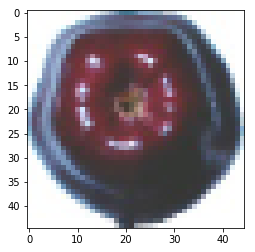

In [23]:
print(X_train[0].shape)
plt.imshow(X_train[0])
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

# Import the backend
from keras import backend as K

In [26]:
# 1. MLP Model
model_dense = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_dense.add(Dense(128, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model_dense.add(Dropout(0.1))
model_dense.add(Dense(64, activation='relu'))
model_dense.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model_dense.add(Dense(75, activation='softmax'))

model_dense.summary()

# Compile the model to put it all together.
model_dense.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_dense = model_dense.fit(X_flat_train, Y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_flat_test, Y_test))
score = model_dense.evaluate(X_flat_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               777728    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 75)                4875      
Total params: 790,859
Trainable params: 790,859
Non-trainable params: 0
_________________________________________________________________
Train on 37836 samples, validate on 12709 samples
Epoch 1/10
37836/37836 [==============================] - 5s 129us/step - loss: 3.3211

In [28]:
# Going to add more dense layers.
model_deep = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
# End with a number of units equal to the number of classes we have for our outcome
model_deep.add(Dense(75, activation='softmax'))

model_deep.summary()

# Compile the model to put it all together.
model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(X_flat_train, Y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_flat_test, Y_test))
score = model_deep.evaluate(X_flat_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               1555456   
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
__________

Adding more layers increased accuracy. 

In [30]:
# 3. Convolutional Neural Network
model_cnn = Sequential()
# First convolutional layer, note the specification of shape
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(45, 45, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(75, activation='softmax'))

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_cnn.fit(X_train, Y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model_cnn.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 37836 samples, validate on 12709 samples
Epoch 1/5
37836/37836 [==============================] - 184s 5ms/step - loss: 2.4603 - acc: 0.3573 - val_loss: 0.5903 - val_acc: 0.8295
Epoch 2/5
37836/37836 [==============================] - 182s 5ms/step - loss: 0.4676 - acc: 0.8495 - val_loss: 0.2469 - val_acc: 0.9280
Epoch 3/5
37836/37836 [==============================] - 188s 5ms/step - loss: 0.1940 - acc: 0.9340 - val_loss: 0.1702 - val_acc: 0.9429
Epoch 4/5
37836/37836 [==============================] - 184s 5ms/step - loss: 0.1229 - acc: 0.9568 - val_loss: 0.1744 - val_acc: 0.9417
Epoch 5/5
37836/37836 [==============================] - 176s 5ms/step - loss: 0.0944 - acc: 0.9663 - val_loss: 0.1656 - val_acc: 0.9518
Test loss: 0.16563410499914552
Test accuracy: 0.951766464710048


Using only 5 epochs, I was able to obtain 95% test accuracy. I will increase it to 7 epochs, but that will probably overfit the data even more so I will decrease the batch size. 

In [31]:
# 4. Modified CNN
model_cnn.fit(X_train, Y_train,
          batch_size=100,
          epochs=7,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model_cnn.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 37836 samples, validate on 12709 samples
Epoch 1/7
37836/37836 [==============================] - 186s 5ms/step - loss: 0.0800 - acc: 0.9705 - val_loss: 0.1830 - val_acc: 0.9467
Epoch 2/7
37836/37836 [==============================] - 185s 5ms/step - loss: 0.0648 - acc: 0.9754 - val_loss: 0.1450 - val_acc: 0.9644
Epoch 3/7
37836/37836 [==============================] - 187s 5ms/step - loss: 0.0610 - acc: 0.9774 - val_loss: 0.1116 - val_acc: 0.9655
Epoch 4/7
37836/37836 [==============================] - 186s 5ms/step - loss: 0.0525 - acc: 0.9801 - val_loss: 0.1014 - val_acc: 0.9688
Epoch 5/7
37836/37836 [==============================] - 194s 5ms/step - loss: 0.0466 - acc: 0.9817 - val_loss: 0.1407 - val_acc: 0.9644
Epoch 6/7
37836/37836 [==============================] - 188s 5ms/step - loss: 0.0442 - acc: 0.9821 - val_loss: 0.1210 - val_acc: 0.9711
Epoch 7/7
37836/37836 [==============================] - 187s 5ms/step - loss: 0.0431 - acc: 0.9824 - val_loss: 0.1271 - val_acc

I think I messed up on this one since it's accuracy started off so high. I forgot to reset it so it may have taken the previous results into account. I did notice that the accuracy did not improve by much even though I increased the epoch size which may be due to the fact I lowered the batch size.

In [36]:
# 5. Heirarchical Recurrent Neural Network

# Set up the training and test set again.
x_train = fruit_images
x_test = validation_fruit_images
y_train = label_ids
y_test = validation_label_ids

batch_size = 64
num_classes = 75
epochs = 5

# Embedding dimensions.
row_hidden = 32
col_hidden = 32

# Reshapes data to 4D for Hierarchical RNN.
x_train = x_train.reshape(x_train.shape[0], 45, 45, 3)
x_test = x_test.reshape(x_test.shape[0], 45, 45, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

row, col, pixel = x_train.shape[1:]

# 4D input.
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper.
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Final predictions and model.
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training.
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (37836, 45, 45, 3)
37836 train samples
12709 test samples
Train on 37836 samples, validate on 12709 samples
Epoch 1/5
37836/37836 [==============================] - 152s 4ms/step - loss: 3.7393 - acc: 0.0695 - val_loss: 3.2530 - val_acc: 0.1089
Epoch 2/5
37836/37836 [==============================] - 151s 4ms/step - loss: 2.8792 - acc: 0.2092 - val_loss: 2.8747 - val_acc: 0.1981
Epoch 3/5
37836/37836 [==============================] - 150s 4ms/step - loss: 2.2893 - acc: 0.3607 - val_loss: 2.3743 - val_acc: 0.3013
Epoch 4/5
37836/37836 [==============================] - 147s 4ms/step - loss: 1.8340 - acc: 0.4810 - val_loss: 1.9605 - val_acc: 0.3837
Epoch 5/5
37836/37836 [==============================] - 147s 4ms/step - loss: 1.4651 - acc: 0.5916 - val_loss: 1.5169 - val_acc: 0.5684
Test loss: 1.5168628042411518
Test accuracy: 0.5684160830907231


# Conclusion

After running the 5 different models, the MLP model was the quickest to run and was highly accurate. Perhaps if I increased the epoch size and the batch size even more it would be even more accurate. A definite way to increase the accuracy of the regular MLP model would be to increase the amount of layers.  

The Convolutional Neural Network was extremely accurate, but it took approximately 3 minutes for each epoch to run. I fear that if I increased the epoch size, it would overfit the model which would be bad. This model has a chance of being in the front if the computer specs are up to par. 

Lastly, the Heirarchical Recurrent Neural Network took about as long as the CNN, but the accuracy was gravely different from its counterpart. I'm surprised it's accuracy is as low as it is, given how the example problem had such a high score. I even increased it epoch size to the same as the CNN.